### regm dataset analysis

In [31]:
import numpy as np
with open('regm.txt') as fp:
    data = [list(map(float, line.strip().split(' '))) for line in fp]
arr= np.array(data)

In [32]:
X = arr[:, 0:7]
y = arr[: ,7:8]
X.shape, y.shape

((500, 7), (500, 1))

### The split of the dataset in two parts at random 

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=None)

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
regressor.intercept_, regressor.coef_

(array([-4.19431969]),
 array([[-3.75095868e-03,  2.01694202e+00, -6.99971145e+00,
          2.20906633e-01, -1.33720824e-04,  1.01340313e+00,
          4.77354888e-02]]))

In [36]:
ypred= regressor.predict(X_val)

### Model evaluation:

In [37]:
## Equivalent sklearn code
from sklearn.metrics import mean_absolute_error, mean_squared_error

sklearn_MSE = mean_squared_error(y_val, ypred)
sklearn_MAE = mean_absolute_error(y_val, ypred)

print('-- sklearn -- \nThe RMSE linReg is ' + str(np.sqrt(sklearn_MSE)))
print('The MAE is linReg ' + str(sklearn_MAE))

-- sklearn -- 
The RMSE linReg is 0.44422114460025863
The MAE is linReg 0.3487711844997683


### 10-splittings in two parts to compare the training and  test error

In [38]:
from sklearn.model_selection import KFold
k = 10
kf = KFold(n_splits=k, random_state=None)
mean_squared = []
train_errors=[]
test_errors=[]
for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index,:],X[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    regressor.fit(X_train,y_train)
    # model evaluation for training set
    y_train_predict = regressor.predict(X_train)
    train_errors.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))
    # model evaluation for testing set
    y_test_predict = regressor.predict(X_test)
    test_errors.append(np.sqrt(mean_squared_error(y_test, y_test_predict)))

avg_trainingError= sum(train_errors)/k
avg_testingError= sum(test_errors)/k
#evaluation of the model training error and testing error 
print('training error - {}'.format(train_errors))
print('testing error - {}'.format(test_errors))
print('Avg RMSE training : {}'.format(avg_trainingError))
print('Avg RMSE testing: {}'.format(avg_testingError))

training error - [0.4764621963684035, 0.46096925359153396, 0.4767287974373102, 0.47190565099171755, 0.4706990823793637, 0.46419556540848744, 0.4761281691069635, 0.48193404366553283, 0.4784102098918431, 0.468555646682672]
testing error - [0.44566503142182184, 0.572129148370749, 0.4413859086265121, 0.4848841313200086, 0.49612579562681974, 0.5487619350806489, 0.44451281419973837, 0.3847042405129153, 0.4218360934763952, 0.5143904658506407]
Avg RMSE training : 0.47259886155238273
Avg RMSE testing: 0.47543955644862496


### comparaison between the training error & testing error:

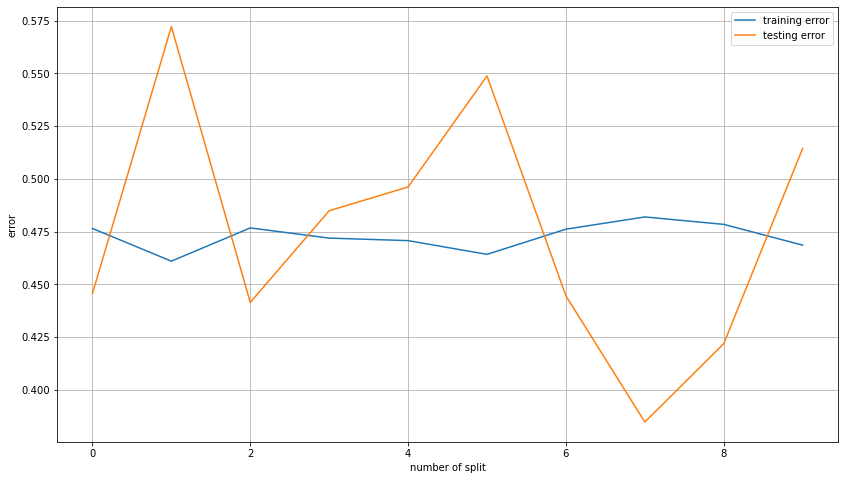

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14, 8))
plt.plot(train_errors,label="training error")
plt.plot(test_errors,label="testing error")
plt.ylabel("error")
plt.xlabel("number of split")
plt.legend()
plt.grid()

### The confidence interval for the observation of the response variable:

In [40]:
sum_errs = np.sum((y_val - ypred)**2)
stdev = np.sqrt(1/(y_val.shape[0]-2) * sum_errs)
# calculate prediction interval
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
lower, upper = ypred - interval, ypred + interval

Prediction Interval: 0.880


In [41]:
for i in range (y_val.shape[0]):
    print('95% likelihood that the '+ 'true value %.3f' %y_val[i] + ' is between %.3f and %.3f' % (lower[i], upper[i]))

95% likelihood that the true value -7.628 is between -8.536 and -6.776
95% likelihood that the true value 3.054 is between 2.165 and 3.924
95% likelihood that the true value -23.973 is between -25.426 and -23.667
95% likelihood that the true value -9.121 is between -9.878 and -8.119
95% likelihood that the true value -37.901 is between -39.527 and -37.768
95% likelihood that the true value 10.195 is between 9.277 and 11.036
95% likelihood that the true value -2.155 is between -3.327 and -1.568
95% likelihood that the true value -22.131 is between -22.874 and -21.115
95% likelihood that the true value -0.664 is between -1.285 and 0.474
95% likelihood that the true value -7.702 is between -8.728 and -6.969
95% likelihood that the true value 9.867 is between 10.057 and 11.816
95% likelihood that the true value 0.705 is between -0.833 and 0.926
95% likelihood that the true value -10.539 is between -11.819 and -10.060
95% likelihood that the true value -2.087 is between -2.379 and -0.620
95

### reg1.txt file

In [12]:
import numpy as np
with open('reg1_2_Col.txt') as fp:
    data = [list(map(float, line.strip().split(' '))) for line in fp]
arr= np.array(data)
arr.shape


(50, 2)

In [13]:
X = arr[:, 0:1]
y = arr[: ,1:2]
X.shape, y.shape

((50, 1), (50, 1))

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=None)
X_train.shape, y_train.shape

((40, 1), (40, 1))

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
regressor.intercept_, regressor.coef_

(array([-3.11325439]), array([[2.00914443]]))

In [17]:
ypred= regressor.predict(X_val)
ypred

array([[ -2.36677446],
       [  4.18715271],
       [  4.20909659],
       [  7.60197896],
       [ -4.18972103],
       [  8.91657422],
       [ -5.96300476],
       [-10.38948546],
       [  0.74829106],
       [  1.93587423]])

In [18]:
## Equivalent sklearn code
from sklearn.metrics import mean_absolute_error, mean_squared_error

sklearn_MSE = mean_squared_error(y_val, ypred)
sklearn_MAE = mean_absolute_error(y_val, ypred)

print('-- sklearn -- \nThe RMSE linReg is ' + str(np.sqrt(sklearn_MSE)))
print('The MAE is linReg ' + str(sklearn_MAE))

-- sklearn -- 
The RMSE linReg is 0.32130088734266027
The MAE is linReg 0.24734694048346575


In [19]:
from sklearn.model_selection import KFold
k = 10
kf = KFold(n_splits=k, random_state=None)
mean_squared = []
train_errors=[]
test_errors=[]
for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index],X[test_index]
    y_train , y_test = y[train_index] , y[test_index]
    regressor.fit(X_train,y_train)
    # model evaluation for training set
    y_train_predict = regressor.predict(X_train)
    train_errors.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))
    # model evaluation for testing set
    y_test_predict = regressor.predict(X_test)
    test_errors.append(np.sqrt(mean_squared_error(y_test, y_test_predict)))

avg_trainingError= sum(train_errors)/k
avg_testingError= sum(test_errors)/k
#evaluation of the model training error and testing error 
print('training error - {}'.format(train_errors))
print('testing error - {}'.format(test_errors))
print('Avg RMSE training : {}'.format(avg_trainingError))
print('Avg RMSE testing: {}'.format(avg_testingError))

training error - [0.31397945644375874, 0.3191452010619769, 0.30987594353729647, 0.3101171301201014, 0.3141910319771611, 0.3064914902220771, 0.3135765173119492, 0.30360580071385806, 0.32607692063439436, 0.29172109389088396]
testing error - [0.29117423965410444, 0.2346690821131595, 0.3364592274346022, 0.3308967361126291, 0.2876234084869887, 0.3598025292620984, 0.31482064515138625, 0.3783333238026778, 0.12176149322169834, 0.46414342678096526]
Avg RMSE training : 0.3108780585913457
Avg RMSE testing: 0.311968411202031


In [20]:
sum_errs = np.sum((y_val - ypred)**2)
stdev = np.sqrt(1/(y_val.shape[0]-2) * sum_errs)
# calculate prediction interval
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
lower, upper = ypred - interval, ypred + interval

Prediction Interval: 0.704


In [21]:
for i in range (y_val.shape[0]):
    print('95% likelihood that the '+ 'true value %.3f' %y_val[i] + ' is between %.3f and %.3f' % (lower[i], upper[i]))

95% likelihood that the true value -1.946 is between -3.071 and -1.663
95% likelihood that the true value 4.068 is between 3.483 and 4.891
95% likelihood that the true value 4.206 is between 3.505 and 4.913
95% likelihood that the true value 7.583 is between 6.898 and 8.306
95% likelihood that the true value -3.747 is between -4.894 and -3.486
95% likelihood that the true value 9.024 is between 8.212 and 9.621
95% likelihood that the true value -6.564 is between -6.667 and -5.259
95% likelihood that the true value -10.080 is between -11.094 and -9.685
95% likelihood that the true value 1.167 is between 0.044 and 1.452
95% likelihood that the true value 1.903 is between 1.232 and 2.640


In [30]:
def pearsonr(x, y):
  n = len(x)
  sum_x = float(sum(x))
  sum_y = float(sum(y))
  sum_x_sq = sum(xi*xi for xi in x)
  sum_y_sq = sum(yi*yi for yi in y)
  psum = sum(xi*yi for xi, yi in zip(x, y))
  num = psum - (sum_x * sum_y/n)
  den = pow((sum_x_sq - pow(sum_x, 2) / n) * (sum_y_sq - pow(sum_y, 2) / n), 0.5)
  if den == 0: return 0
  return num / den
pearsonr(X,y)

array([0.99926767])

We have a correlation between the feature X and the target label y because the correlation corr=0.99 <br>
in this case, the correlation is very strong. (positive correlation) 
